# **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option("display.max_column",None)

import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**IMPORTING DATA**

In [2]:
df = pd.read_csv("/kaggle/input/car-new/Car_Dekho.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
df.drop('Unnamed: 0.1',axis = 1,inplace = True)

In [4]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [5]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


**Shape of the data**

In [6]:
df.shape

(15411, 13)

**Summary of the Data**

In [7]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


**Checking the data types**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


# **EXPLORING DATA**

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']

print(f"There are {len(numerical_features)} in numerical features {numerical_features}")
print(f"There are {len(categorical_features)} in categorical features {categorical_features}")

There are 7 in numerical features ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
There are 6 in categorical features ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


**Feature Information**

* car_name: This column represents the name or model of the car. It likely contains unique identifiers or names for each car.

* brand: This column represents the brand or manufacturer of the car. It specifies the company that produces the car, such as Toyota, Honda, or Ford.

* model: This column represents the specific model of the car. It provides more detailed information about the car's version or variant within a particular brand.

* vehicle_age: This column represents the age or number of years since the car was manufactured or first registered. It provides information about the car's overall age.

* km_driven: This column represents the distance or number of kilometers driven by the car. It indicates the mileage or usage of the car over its lifetime.

* seller_type: This column represents the type of seller who is selling the car. It could indicate whether the seller is an individual, a dealer, or some other type of seller.

* fuel_type: This column represents the type of fuel used by the car. It could indicate whether the car runs on petrol, diesel, electric, or any other fuel type.

* transmission_type: This column represents the type of transmission system in the car. It indicates whether the car has a manual transmission or an automatic transmission.

* mileage: This column represents the average mileage or fuel efficiency of the car. It provides information about the distance the car can travel per unit of fuel consumed.

* engine: This column represents the engine capacity or size of the car. It specifies the volume of the engine, typically measured in cubic centimeters (cc) or liters (L).

* max_power: This column represents the maximum power output of the car's engine. It provides information about the car's engine performance in terms of power.

* seats: This column represents the number of seats available in the car. It indicates the seating capacity or the maximum number of passengers the car can accommodate.

* selling_price: This column represents the selling price or the price at which the car is listed for sale. It indicates the monetary value assigned to the car by the seller.

In [10]:
#Proportion of different car brands
for i in categorical_features:
    print(df[i].value_counts(normalize = True) * 100)
    print('---------------------------------------')

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
---------------------------------------
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini    

# UNIVARIATE ANALYSIS

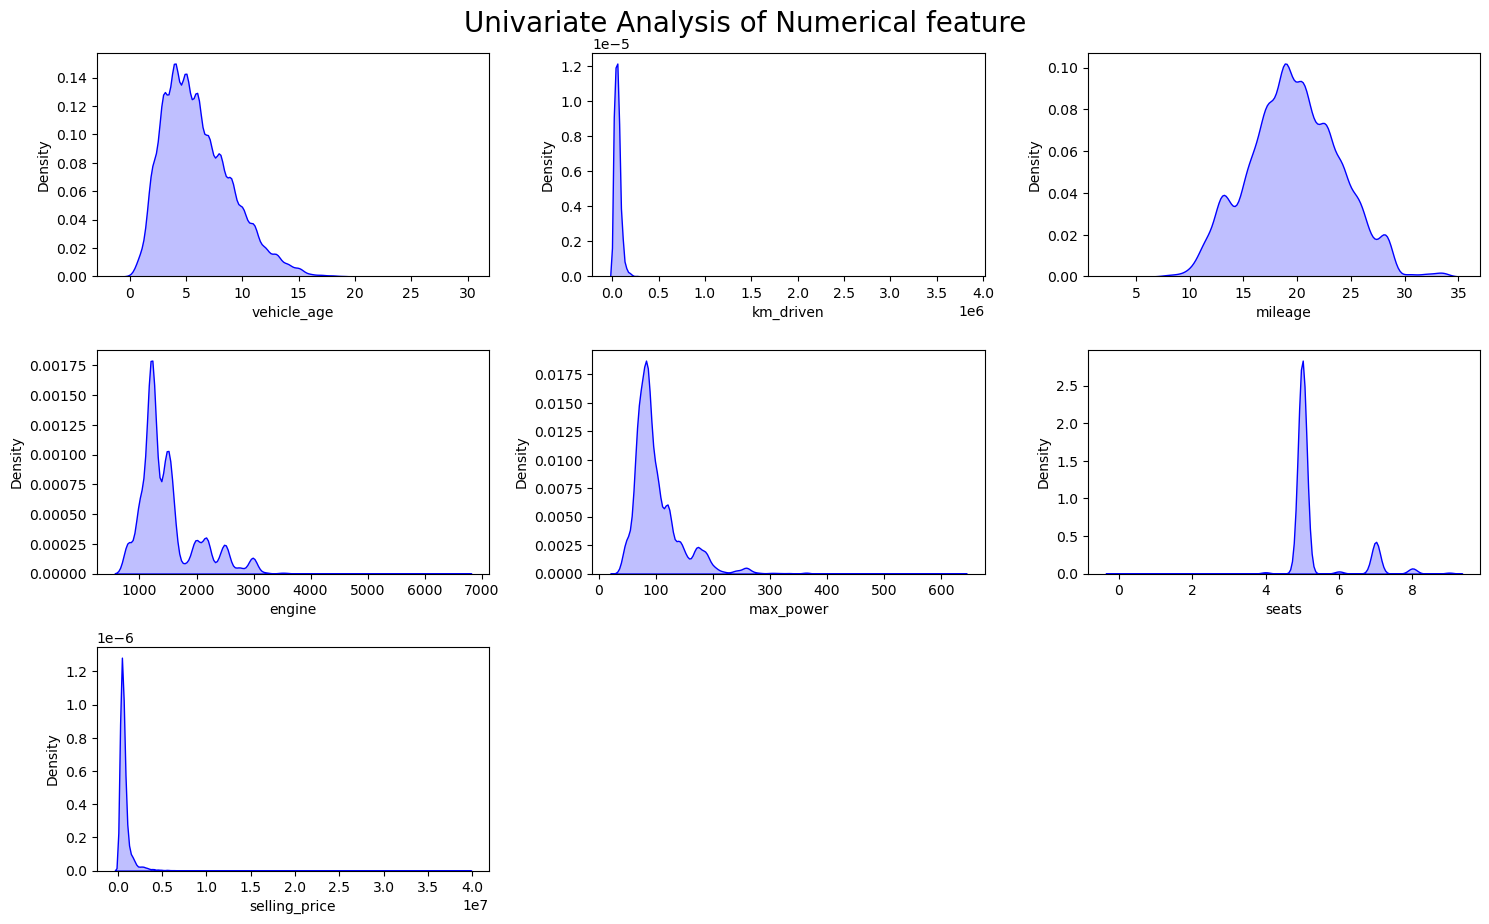

In [13]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical feature',fontsize = 20)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade = True,color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

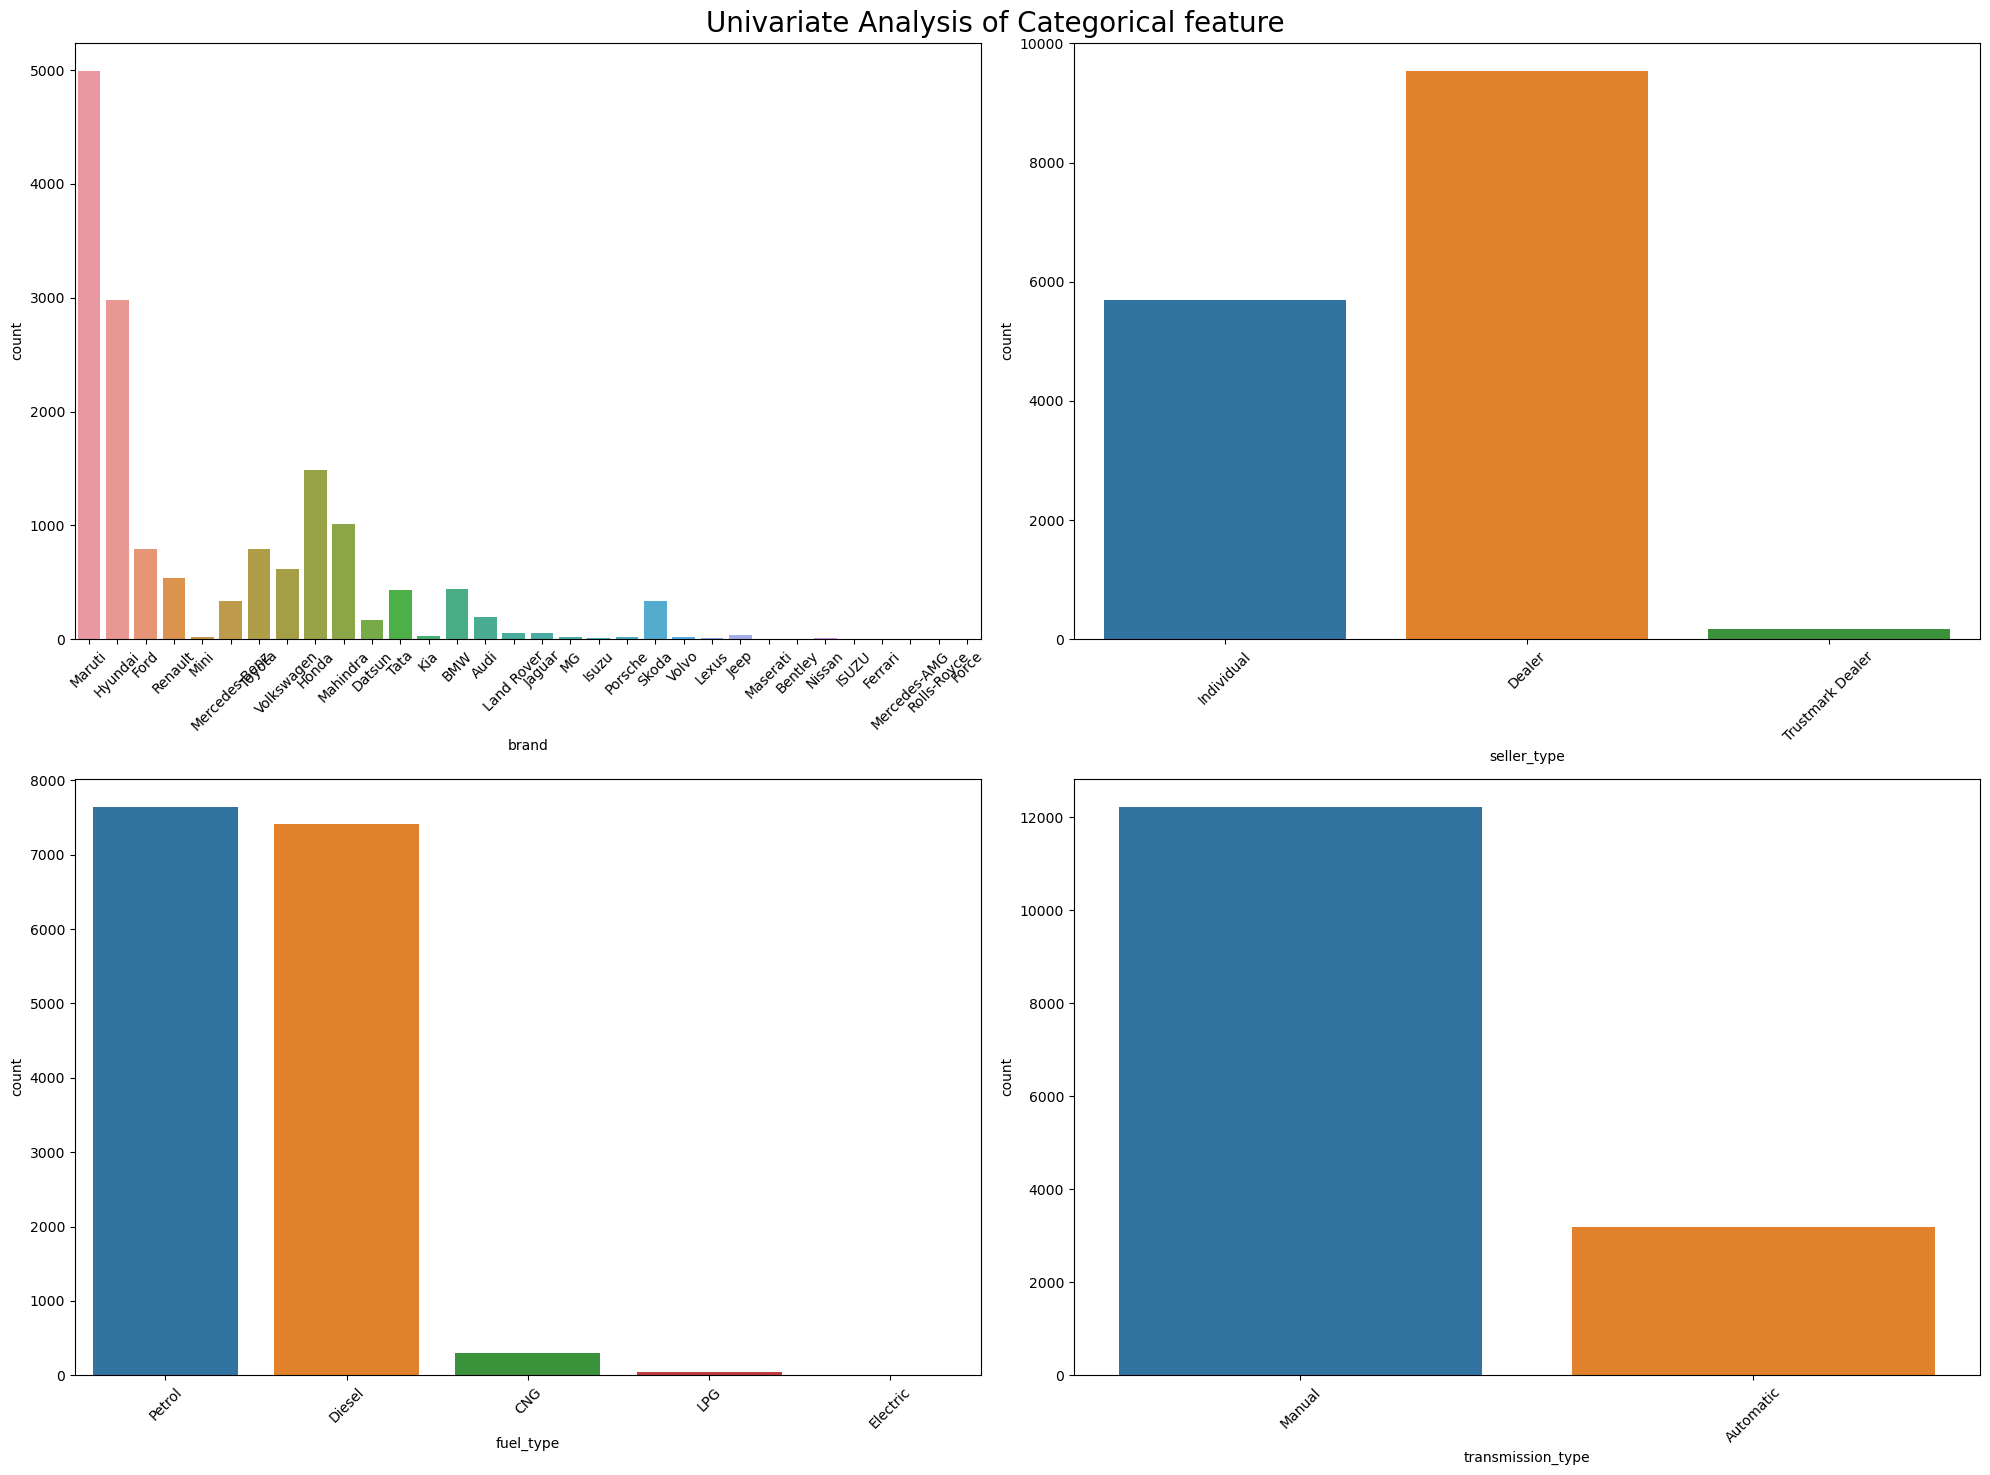

In [16]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical feature',fontsize = 20)

cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# **MULTIVARIATE ANALYSIS**

**CORREALTION**

In [17]:
df.corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


**HEATMAP**

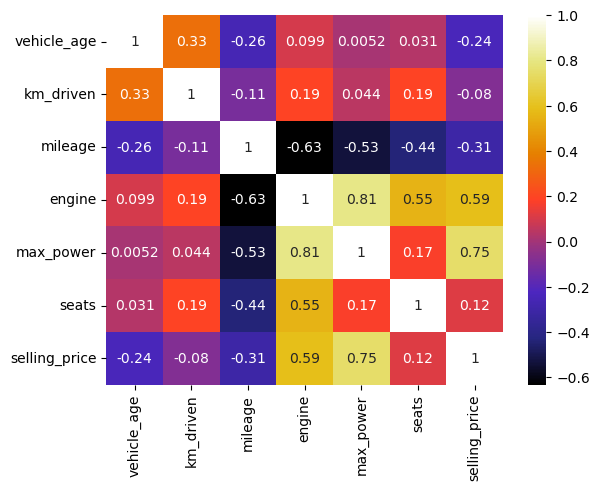

In [22]:
sns.heatmap(df.corr(),annot=True,cmap = 'CMRmap')
plt.show()

**CHECKING NULL VALUES**

In [23]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

**CHECKING DUPLICATE VALUES**

In [25]:
df.duplicated().sum()

167

In [26]:
df.drop_duplicates(inplace=True)